In [148]:
import random
import networkx as nx

with open("input25.txt", "r") as f:
    data = f.read().replace(":","").split("\n")
data = [l.split() for l in data]

def graph_maker(data):
    graph = {comp:set() for line in data for comp in line}
    for line in data:
        for comp in line[1:]:
            graph[line[0]].add(comp)
            graph[comp].add(line[0])
    return graph

graph = graph_maker(data)
# G = nx.Graph(graph)
# nx.draw(G, node_size=.1, linewidths=1, alpha=.3, with_labels=True)

In [ ]:
#greedy MaxCut
# max_cut = 0
vertices = list(graph.keys())
for _ in range(100000):
    group0, group1, later = set(), set(), set()
    random.shuffle(vertices)
    for v in vertices: #order dependent
        if len(group0)+len(group1)==0: group0.add(v); continue
        cut0 = len(graph[v].intersection(group1)) #cut if v placed in 0
        cut1 = len(graph[v].intersection(group0)) #cut if v placed in 1
        # if cut0+cut1==0: later.add(v); continue #if new vertex has no edge with existing ones, set it for later
        if cut0 > cut1: group0.add(v)
        else: group1.add(v)
        # print(group0, group1)
    # for v in later:
    #     cut0 = len(graph[v].intersection(group1)) #cut if v placed in 0
    #     cut1 = len(graph[v].intersection(group0)) #cut if v placed in 1
    #     if cut0 > cut1: group0.add(v)
    #     else: group1.add(v)
        # print(group0, group1)    
    cut = 0
    for v in group0:
        cut += len(graph[v].intersection(group1))
    if max_cut < cut:
        max_groups = [group0, group1]
        max_cut = cut
        print("\r"+str(max_cut),end="")
max_cut#, max_groups

2515

2515

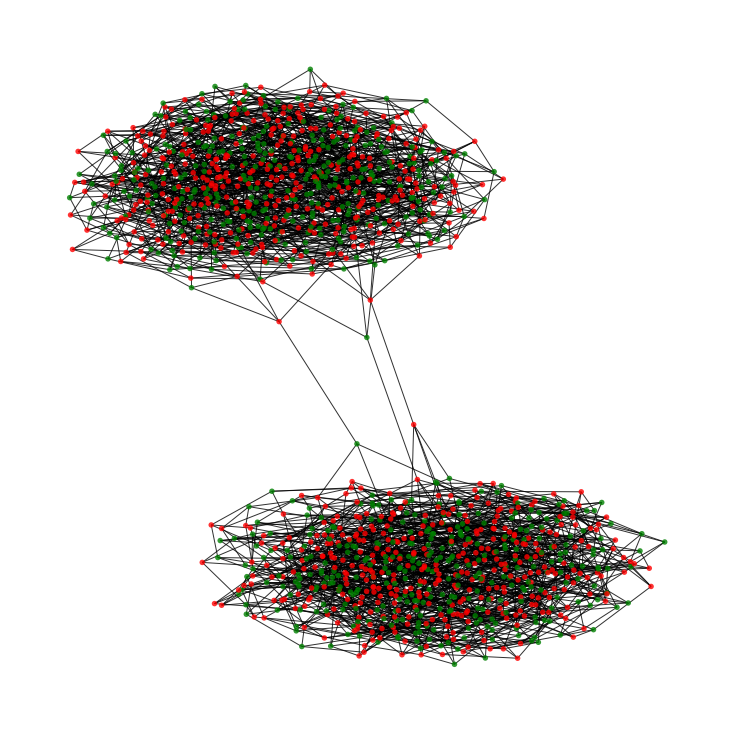

In [124]:
import matplotlib.pyplot as plt
graphcol = [('g' if v in max_groups[0] else 'r') for v in graph]
plt.rcParams["figure.figsize"] = (10,10)
nx.draw(nx.Graph(graph), node_size=30, linewidths=.0001, alpha=.8, with_labels=False, node_color=graphcol)

504

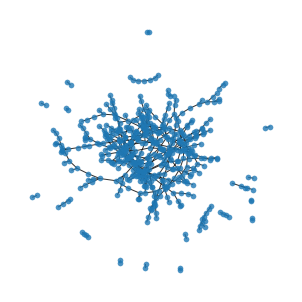

In [150]:
# red_keys = {random.choice(list(graph.keys())) for _ in range(int(len(graph)/2))}
red_keys = vertices
red_graph = {k:graph[k].intersection(red_keys) for k in red_keys if graph[k].intersection(red_keys)!=set()}
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4,4)
nx.draw(nx.Graph(red_graph), node_size=30, linewidths=.1, alpha=.8, with_labels=False)
len(red_graph)

In [151]:
graph = red_graph

In [4]:
import numpy as np
import cvxpy as cp
np.set_printoptions(linewidth=np.inf, threshold=np.inf)

adj_mat = np.zeros((len(graph),len(graph)), int)
name2num = {name:list(graph.keys()).index(name) for name in graph}
for vi in graph:
    for vj in graph[vi]:
        adj_mat[name2num[vi],name2num[vj]] = 1

V = cp.Variable((len(graph),len(graph)), complex=False, symmetric=True) #Gram matrix of vectors, 1 for each vertex
constraints = [V>>0]+[V[i,i]==1 for i in range(V.shape[0])]
prob = cp.Problem(cp.Minimize(cp.trace(V@adj_mat)), constraints)
(2*int(adj_mat.sum()/2)-prob.solve())/4#, V.value

502.3410266621366

In [5]:
#np.sign(V.value).astype(int) not compatible with joint assignments, it's a relaxed value!
print("Relaxed max cut:",int((adj_mat.sum()-np.trace(np.sign(V.value)@adj_mat))/4))
max_cut = 0
for j in range(V.value.shape[0]):
    group0 = {list(name2num.keys())[v] for v in {i[0] for i in np.argwhere(np.sign(V.value).astype(int)[j]==1)}}
    group1 = set(graph.keys())-group0
    cut = 0
    for v in group0:
        cut += len(graph[v].intersection(group1))
    if max_cut < cut:
        max_groups = [group0, group1]
        max_cut = cut
        print("\r"+str(max_cut),end="")
print("\rMax cut:", max_cut, max_groups)
sdp_maxcut, sdp_maxgroups = max_cut, max_groups

Relaxed max cut: 504
Max cut: 496 [{'fgq', 'psg', 'dzd', 'qzp', 'hqz', 'nxd', 'lzd', 'jqg', 'hjc', 'tcl', 'rkg', 'jqt', 'zrv', 'mfn', 'zdc', 'mzb', 'xbm', 'chj', 'cnk', 'tcm', 'fcb', 'vpq', 'btg', 'gdn', 'snl', 'fqz', 'nqp', 'jgg', 'jdr', 'gqr', 'kcx', 'tcq', 'mkv', 'gbf', 'xxm', 'gdz', 'npm', 'zmt', 'xsq', 'cxc', 'zjr', 'lkp', 'zkr', 'czb', 'ptg', 'kbm', 'dvq', 'gfj', 'blz', 'qhf', 'rnn', 'pbk', 'shc', 'drc', 'kqb', 'lzj', 'thl', 'vpl', 'rxt', 'nzj', 'vgj', 'gch', 'dst', 'pbs', 'xjx', 'hqr', 'kgl', 'jcp', 'hkx', 'nrt', 'mkk', 'lpp', 'xcg', 'gtb', 'ldt', 'dxt', 'jjl', 'txb', 'khf', 'pjt', 'sjx', 'xhz', 'kxv', 'fzs', 'qqp', 'ltl', 'zxz', 'ghq', 'lgg', 'hdl', 'bpc', 'qqh', 'vcf', 'jcj', 'hns', 'ffs', 'ksz', 'vlt', 'zqd', 'pkn', 'tjb', 'ggz', 'fkb', 'pls', 'vrc', 'tht', 'dgr', 'bvq', 'dvx', 'vlr', 'xfr', 'fbm', 'rmm', 'flb', 'lgh', 'dgp', 'tnh', 'dhn', 'jzt', 'mkh', 'lvz', 'vkr', 'rrq', 'npd', 'ssp', 'bsq', 'ttn', 'qgv', 'rnx', 'kjl', 'srq', 'zqg', 'ssl', 'hms', 'jcm', 'ksd', 'ccv', 'kpd'

In [93]:
#greedy MaxCut
# max_cut = 0
vertices = list(graph.keys())
for _ in range(100000):
    group0, group1, later = set(), set(), set()
    random.shuffle(vertices)
    for v in vertices: #order dependent
        if len(group0)+len(group1)==0: group0.add(v); continue
        cut0 = len(graph[v].intersection(group1)) #cut if v placed in 0
        cut1 = len(graph[v].intersection(group0)) #cut if v placed in 1
        if cut0+cut1==0: later.add(v); continue #if new vertex has no edge with existing ones, set it for later
        if cut0 > cut1: group0.add(v)
        else: group1.add(v)
        # print(group0, group1)
    for v in later:
        cut0 = len(graph[v].intersection(group1)) #cut if v placed in 0
        cut1 = len(graph[v].intersection(group0)) #cut if v placed in 1
        if cut0 > cut1: group0.add(v)
        else: group1.add(v)
        # print(group0, group1)    
    cut = 0
    for v in group0:
        cut += len(graph[v].intersection(group1))
    if max_cut < cut:
        max_groups = [group0, group1]
        max_cut = cut
        print("\r"+str(max_cut),end="")
max_cut#, max_groups

465

In [154]:
#local-greedy MaxCut by
# max_cut = 0
for _ in range(10000):
    vertices = set(graph.keys())
    # random.shuffle(vertices)
    group0, group1 = set(), set()
    while vertices!=set():
        v = vertices.pop()
        queue = graph[v].copy(); group0.add(v)
        vertices.difference_update(queue)
        while queue!=set():
            v = queue.pop()
            cut0 = len(graph[v].intersection(group1)) #cut if v placed in 0
            cut1 = len(graph[v].intersection(group0)) #cut if v placed in 1
            if cut0 > cut1: group0.add(v)
            else: group1.add(v)
            queue.update(graph[v].difference(group0,group1))
            vertices.difference_update(queue)
            # print(group0, group1)
    cut = 0
    for v in group0:
        cut += len(graph[v].intersection(group1))
    if max_cut < cut:
        max_groups = [group0, group1]
        max_cut = cut
        print("\r"+str(max_cut),end="")
max_cut#, max_groups

490

In [153]:
len(max_groups[0].intersection(sdp_maxgroups[0])), len(max_groups[1].intersection(sdp_maxgroups[1])), len(max_groups[0].intersection(sdp_maxgroups[1])), len(max_groups[1].intersection(sdp_maxgroups[0]))

(126, 126, 114, 138)

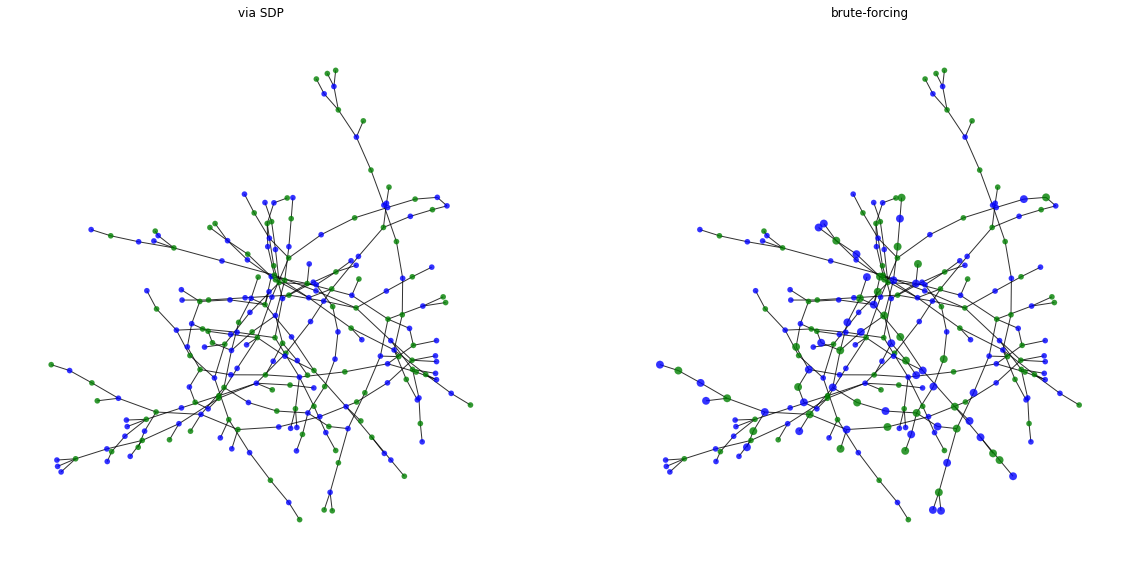

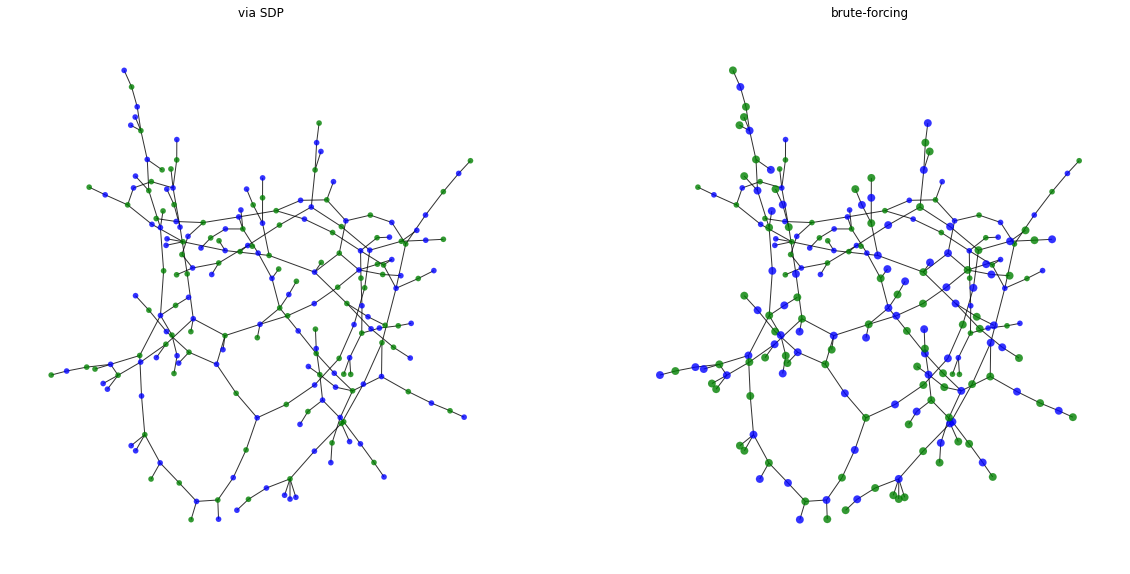

(230, 207)

In [152]:
size_list, big_groups = [], []
vertices = set(graph.keys())
while vertices!=set():
    curr_v = vertices.pop()
    queue = graph[curr_v].copy()
    vertices.difference_update(queue)
    curr_group = {curr_v}.union(queue)
    while queue!=set():
        vtx = queue.pop()
        neighbors = {v for v in graph[vtx]}
        queue.update(neighbors.difference(curr_group))
        curr_group.update(neighbors)
        vertices.difference_update(neighbors)
    size_list.append(len(curr_group))
    if len(curr_group)>20:
        big_groups.append(curr_group)

keysp0, keysp1 = big_groups[0], big_groups[1]
graphp0, graphp1 = {k:graph[k].intersection(keysp0) for k in keysp0}, {k:graph[k].intersection(keysp1) for k in keysp1}
pos0, pos1 = nx.spring_layout(nx.Graph(graphp0)), nx.spring_layout(nx.Graph(graphp1))

fig, (ax_sdp, ax_bf) = plt.subplots(1,2, figsize=(20,10))
sdp_graphcol = [('b' if v in sdp_maxgroups[0] else 'g') for v in graphp0]
bf_graphcol = [('b' if v in max_groups[1] else 'g') for v in graphp0]
diffgroups = [(30 if (v in max_groups[0] and v in sdp_maxgroups[1]) or (v in max_groups[1] and v in sdp_maxgroups[0]) else 60) for v in graphp0]
nx.draw(nx.Graph(graphp0), pos=pos0, node_size=30, node_color=sdp_graphcol, linewidths=.1, alpha=.8, with_labels=False, ax=ax_sdp)
nx.draw(nx.Graph(graphp0), pos=pos0, node_size=diffgroups, node_color=bf_graphcol, linewidths=.1, alpha=.8, with_labels=False, ax=ax_bf)
ax_sdp.set_title("via SDP"); ax_bf.set_title("brute-forcing"); fig.set_label("Graph part 0"); plt.show()

fig, (ax_sdp, ax_bf) = plt.subplots(1,2, figsize=(20,10))
sdp_graphcol = [('b' if v in sdp_maxgroups[0] else 'g') for v in graphp1]
bf_graphcol = [('b' if v in max_groups[1] else 'g') for v in graphp1]
diffgroups = [(30 if (v in max_groups[0] and v in sdp_maxgroups[1]) or (v in max_groups[1] and v in sdp_maxgroups[0]) else 60) for v in graphp1]
nx.draw(nx.Graph(graphp1), pos=pos1, node_size=30, node_color=sdp_graphcol, linewidths=.1, alpha=.8, with_labels=False, ax=ax_sdp)
nx.draw(nx.Graph(graphp1), pos=pos1, node_size=diffgroups, node_color=bf_graphcol, linewidths=.1, alpha=.8, with_labels=False, ax=ax_bf)
ax_sdp.set_title("via SDP"); ax_bf.set_title("brute-forcing"); fig.set_label("Graph part 1"); plt.show()
len(graphp0), len(graphp1)

In [26]:
#greedy MaxCut
max_cut = 0
vertices = list(graph.keys())
for _ in range(100000):
    group0, group1, later = set(), set(), set()
    random.shuffle(vertices)
    for v in vertices: #order dependent
        if len(group0)+len(group1)==0: group0.add(v); continue
        cut0 = len(graph[v].intersection(group1)) #cut if v placed in 0
        cut1 = len(graph[v].intersection(group0)) #cut if v placed in 1
        # if cut0+cut1==0: later.add(v); continue #if new vertex has no edge with existing ones, set it for later
        if cut0 > cut1: group0.add(v)
        else: group1.add(v)
        # print(group0, group1)
    # for v in later:
    #     cut0 = len(graph[v].intersection(group1)) #cut if v placed in 0
    #     cut1 = len(graph[v].intersection(group0)) #cut if v placed in 1
    #     if cut0 > cut1: group0.add(v)
    #     else: group1.add(v)
        # print(group0, group1)    
    cut = 0
    for v in group0:
        cut += len(graph[v].intersection(group1))
    if max_cut < cut:
        max_groups = [group0, group1]
        max_cut = cut
        print("\r"+str(max_cut),end="")
max_cut#, max_groups

59

59

In [28]:
print(max_groups)

[{'ppd', 'ffs', 'mkd', 'lsm', 'sgr', 'qqm', 'dcl', 'xfv', 'fdx', 'drz', 'kbn', 'snl', 'lkq', 'bkq', 'vtr', 'gng', 'fzk', 'psn', 'smb', 'dgp', 'pzz', 'vxs', 'pnr', 'lsh', 'hsx', 'dnn', 'vxm', 'hhd', 'skr', 'hqz', 'bqq', 'chz', 'jfh', 'pbh', 'gmk', 'pvh', 'vcj', 'qgf', 'hvb', 'hnl', 'tfs', 'mlh', 'mjm', 'kdx', 'nfk', 'dtc', 'mdz', 'dkj'}, {'hnj', 'lxb', 'zkt', 'dnj', 'zch', 'fbg', 'nsk', 'bgx', 'nsx', 'hjx', 'dmm', 'bfh', 'xxc', 'dvx', 'kpd', 'ctc', 'pjc', 'kcj', 'hnn', 'ndp', 'djh', 'tlv', 'hfv', 'hqd', 'tpn', 'zfm', 'thr', 'kvk', 'shc', 'hjc', 'ntd', 'fgh', 'bdc', 'ztt', 'stm', 'vxr', 'lgf', 'fcn', 'qvb', 'xdf', 'rcc', 'nfv', 'kmt', 'hdk', 'cdh', 'dtb', 'bcl', 'cmg', 'qvn', 'hln', 'nnc', 'gst', 'prn', 'tcp', 'cxr', 'hdn', 'smh', 'gzr', 'smc', 'pqm', 'jvv', 'zns', 'mnl', 'rxt', 'jkc', 'mkv', 'bhr', 'jhk', 'lrg', 'qcp', 'qrn', 'ktl', 'kqq', 'tvf', 'zhh', 'ftq', 'xzx', 'btx', 'qsp', 'bzn', 'qll', 'qqs', 'sxs', 'cdp', 'szr', 'vcm', 'pfl', 'zxq', 'ctl', 'qck', 'pbv', 'fgr', 'pcr', 'bzf', 'k

.

.

.

.

.

.

.

.

In [34]:

def contract_2(graph):#contract to 2, randomly, returns just the groups
    from copy import deepcopy
    graph = deepcopy(graph)
    while len(graph)>2:
        v1 = random.choice(list(graph.keys()))
        v2 = random.choice(list(graph[v1]))
        graph.update({v1+v2: graph[v1].union(graph[v2])-{v1,v2}})
        del graph[v1], graph[v2]
        for v in graph[v1+v2]:
            graph[v].discard(v1)
            graph[v].discard(v2)
            graph[v].add(v1+v2)
    return list(graph.keys())
def Kargers(graph, cut_size=3):#Karger's algorithm
    ct = cut_size + 1 
    while ct!=cut_size:
        reduced = contract_2(graph)
        groups = [[reduced[i][j:j+3] for j in range(0,len(reduced[i]),3)] for i in range(2)]
        ct = 0
        for v0 in groups[0]:
            for v1 in groups[1]:
                ct = ct + (1 if v1 in graph[v0] else 0)
    return groups

graph = graph_maker(data)
groups = Kargers(graph)
len(groups[0])*len(groups[1]), len(groups[0]), len(groups[1])

(525264, 744, 706)

In [77]:
#bad ideas

def fully_conn(graph):
    init = random.choice(list(graph.keys()))
    queue, visited = {init}, {init}
    while queue != set():
        current = queue.pop()
        neighbors = graph[current]
        queue.update(neighbors-visited)
        visited.update(neighbors)
    if len(visited) == len(graph):
        return True
    else:
        return False  
def size_conn(graph):
    from collections import deque
    init = random.choice(list(graph.keys()))
    queue, visited = deque([init]), {init}
    while queue != deque([]):
        current = queue.pop()
        neighbors = graph[current]
        queue.extendleft((neighbors-visited))
        visited.update(neighbors)
    #one could try if it's fully connected, then count the other graph, but we only need the size of one group
    return len(visited)
def cut(graph, disconnected):
    from copy import deepcopy
    graph = deepcopy(graph)
    for comp1, comp2 in disconnected:
        graph[comp1].remove(comp2)
        graph[comp2].remove(comp1)
    return graph
#brute force random cut of three
def cut3rand(graph):
    from copy import deepcopy
    #disconnected = []
    graph = deepcopy(graph)
    for _ in range(3):
        comp1 = random.choice(list(graph.keys()))
        comp2 = random.choice(list(graph[comp1]))
        graph[comp1].remove(comp2)
        graph[comp2].remove(comp1)
        #disconnected.append({comp1,comp2})
    return graph#, disconnected
#brute force non-random
def brute_force(graph):
    pair_list = []
    for comp1 in graph:
        for comp2 in graph[comp1]:
            pair_list.append((comp1, comp2)) if (comp2,comp1) not in pair_list else None

    total = len(graph)
    for i in range(len(pair_list)):
        for j in range(i+1, len(pair_list)):
            for k in range(j+1, len(pair_list)):
                disconnected = [pair_list[i], pair_list[j], pair_list[k]]
                cutgraph = cut(graph, disconnected)
                size = size_conn(cutgraph)
                if size<total:
                    return size
    return size#, disconnected

def brute_force2(graph):
    pair_list = []
    for comp1 in graph:
        for comp2 in graph[comp1]:
            pair_list.append((comp1, comp2)) if (comp2,comp1) not in pair_list else None
    total = len(graph)

    for i in range(len(pair_list)):
        cutgraph1 = cut(graph, [pair_list[i]])
        for j in range(i+1, len(pair_list)):
            cutgraph2 = cut(cutgraph1, [pair_list[j]])
            for k in range(j+1, len(pair_list)):
                cutgraph3 = cut(cutgraph2, [pair_list[k]])
                size = size_conn(cutgraph3)
                if size<total:
                    return size#, [pair_list[i], pair_list[j], pair_list[k]]
    return 0